In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd

#  Loading the CSV files
df_drivers = pd.read_csv("/content/drive/MyDrive/F1 race data to 2025/drivers (2).csv")
df_races = pd.read_csv("/content/drive/MyDrive/F1 race data to 2025/races (5).csv")
df_results = pd.read_csv("/content/drive/MyDrive/F1 race data to 2025/results.csv")
df_qualifying = pd.read_csv("/content/drive/MyDrive/F1 race data to 2025/qualifying.csv")

#  Quick check: previewing datasets
print("Drivers dataset shape:", df_drivers.shape)
print("Races dataset shape:", df_races.shape)
print("Results dataset shape:", df_results.shape)
print("Qualifying dataset shape:", df_qualifying.shape)

Drivers dataset shape: (616, 5)
Races dataset shape: (1149, 7)
Results dataset shape: (7600, 9)
Qualifying dataset shape: (3017, 7)


In [ ]:
#  Checking for missing values in each dataset
print("Missing values in Drivers dataset:\n", df_drivers.isnull().sum())
print("\nMissing values in Races dataset:\n", df_races.isnull().sum())
print("\nMissing values in Results dataset:\n", df_results.isnull().sum())
print("\nMissing values in Qualifying dataset:\n", df_qualifying.isnull().sum())

#  Dropping rows with missing values only where essential columns are missing or for the driver/results dataset
df_drivers.dropna(inplace=True)
df_races.dropna(inplace=True)
df_results.dropna(inplace=True)
df_qualifying.dropna(inplace=True)

#  Verifying if missing values still exist
print("\nAfter cleaning:")
print("Drivers:", df_drivers.isnull().sum().sum(), "missing values")
print("Races:", df_races.isnull().sum().sum(), "missing values")
print("Results:", df_results.isnull().sum().sum(), "missing values")
print("Qualifying:", df_qualifying.isnull().sum().sum(), "missing values")

Missing values in Drivers dataset:
 driver_id      0
givenName      0
familyName     0
nationality    0
dob            0
dtype: int64

Missing values in Races dataset:
 race_id         0
season          0
round           0
race_name       0
date            0
time          731
circuit_id      0
dtype: int64

Missing values in Results dataset:
 race_id           0
driver_id         0
constructor_id    0
grid              0
position          0
position_order    0
points            0
laps              0
status            0
dtype: int64

Missing values in Qualifying dataset:
 race_id              0
driver_id            0
constructor_id       0
position             0
q1                  39
q2                1442
q3                2059
dtype: int64

After cleaning:
Drivers: 0 missing values
Races: 0 missing values
Results: 0 missing values
Qualifying: 0 missing values


In [ ]:
#  Checking dataset dimensions
print("Drivers dataset shape:", df_drivers.shape)
print("Races dataset shape:", df_races.shape)
print("Results dataset shape:", df_results.shape)
print("Qualifying dataset shape:", df_qualifying.shape)

#  Basic information and statistics
print("\nDrivers dataset info:")
df_drivers.info()

print("\nRaces dataset info:")
df_races.info()

print("\nResults dataset info:")
df_results.info()

Drivers dataset shape: (616, 5)
Races dataset shape: (418, 7)
Results dataset shape: (7600, 9)
Qualifying dataset shape: (958, 7)

Drivers dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driver_id    616 non-null    object
 1   givenName    616 non-null    object
 2   familyName   616 non-null    object
 3   nationality  616 non-null    object
 4   dob          616 non-null    object
dtypes: object(5)
memory usage: 24.2+ KB

Races dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 731 to 1148
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   race_id     418 non-null    object
 1   season      418 non-null    int64 
 2   round       418 non-null    int64 
 3   race_name   418 non-null    object
 4   date        418 non-null    object
 5   time   

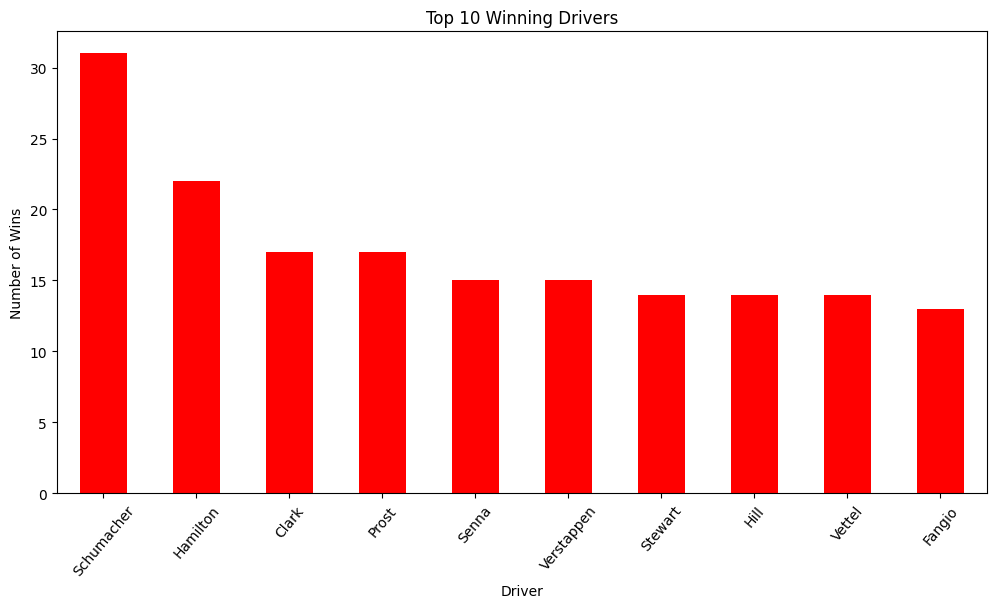

In [ ]:
# Merging results with drivers to get driver names for winners
winners = df_results[df_results['position_order'] == 1]  # positionOrder == 1 means race winner
winners = winners.merge(df_drivers, left_on='driver_id', right_on='driver_id')

# Counting top winning drivers
top_winners = winners['familyName'].value_counts().head(10)

#  Plotting top 10 winning drivers
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
top_winners.plot(kind='bar', color='red')
plt.title("Top 10 Winning Drivers")
plt.xlabel("Driver")
plt.ylabel("Number of Wins")
plt.xticks(rotation=50)
plt.show()

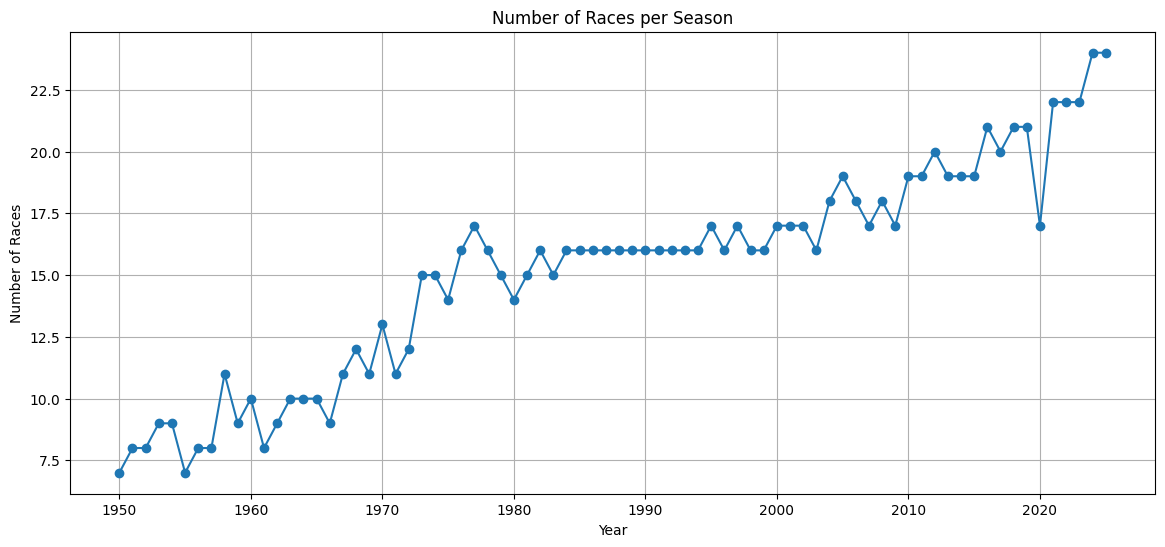

In [ ]:
races_per_year = df_races['season'].value_counts().sort_index()

plt.figure(figsize=(14,6))
races_per_year.plot(kind='line', marker='o')
plt.title("Number of Races per Season")
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.grid(True)
plt.show()

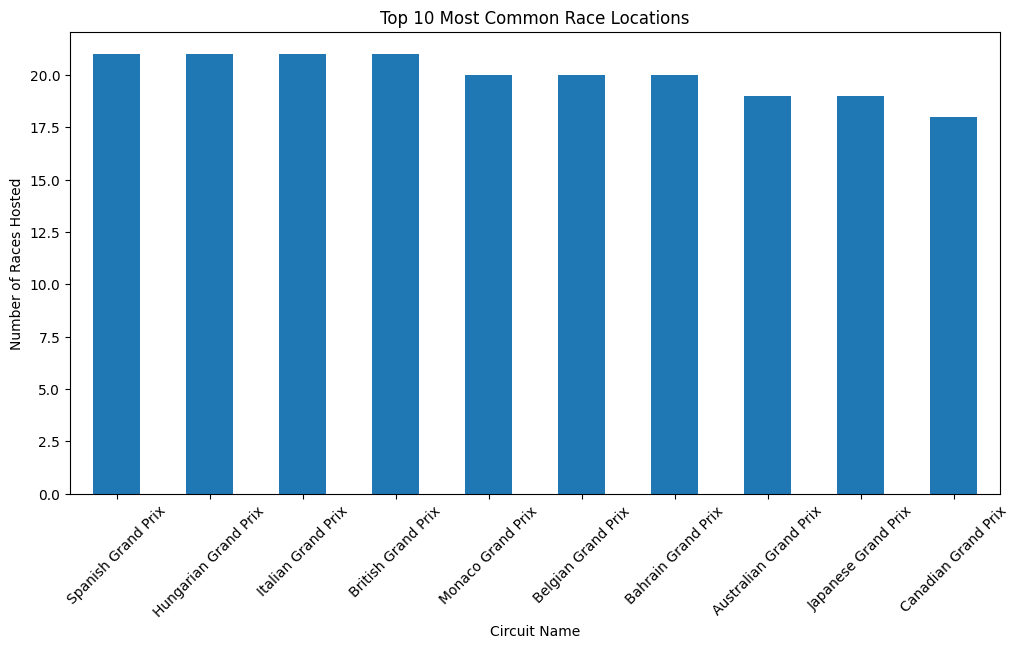

In [ ]:
top_circuits = df_races['race_name'].value_counts().head(10)

plt.figure(figsize=(12,6))
top_circuits.plot(kind='bar')
plt.title("Top 10 Most Common Race Locations")
plt.xlabel("Circuit Name")
plt.ylabel("Number of Races Hosted")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127950 (\N{RACING CAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


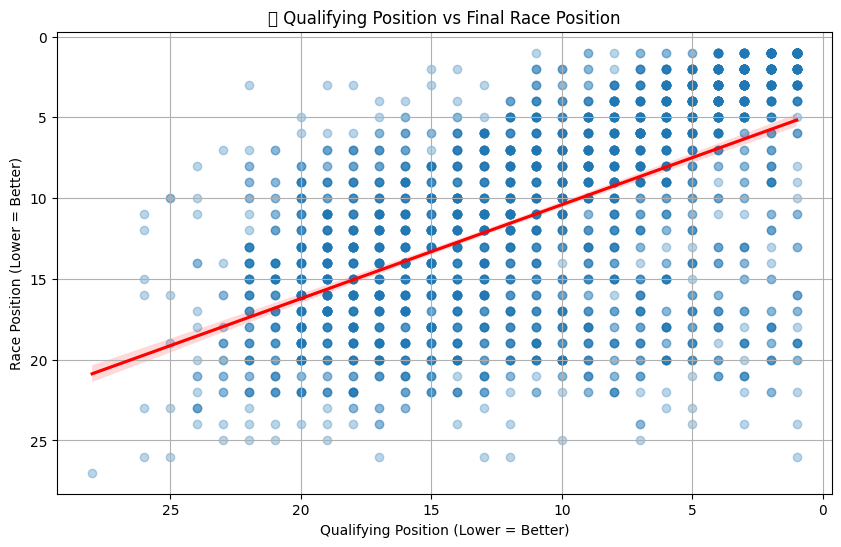

Correlation between Qualifying and Race position: 0.58


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merging qualifying and results datasets on race_id and driver_id
df_qual_race = pd.merge(
    df_qualifying[['race_id', 'driver_id', 'position']],
    df_results[['race_id', 'driver_id', 'position_order']],
    on=['race_id', 'driver_id'],
    how='inner'
)

# Renaming columns for clarity
df_qual_race.rename(columns={'position': 'qualifying_position', 'position_order': 'race_position'}, inplace=True)

# Converting to numeric (in case of any string values)
df_qual_race['qualifying_position'] = pd.to_numeric(df_qual_race['qualifying_position'], errors='coerce')
df_qual_race['race_position'] = pd.to_numeric(df_qual_race['race_position'], errors='coerce')

# Dropping NaN rows if any
df_qual_race.dropna(inplace=True)

# Scatter plot with trend line
plt.figure(figsize=(10,6))
sns.regplot(data=df_qual_race, x='qualifying_position', y='race_position', scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('🏎️ Qualifying Position vs Final Race Position')
plt.xlabel('Qualifying Position (Lower = Better)')
plt.ylabel('Race Position (Lower = Better)')
plt.gca().invert_xaxis()  # Because P1 is the best, so better to invert X for clarity
plt.gca().invert_yaxis()  # Same for race position
plt.grid(True)
plt.show()

# Correlation coefficient
correlation = df_qual_race['qualifying_position'].corr(df_qual_race['race_position'])
print(f"Correlation between Qualifying and Race position: {correlation:.2f}")

In [ ]:
# 🧠 Selecting important columns from each dataset
races_data = df_races[['race_id', 'season', 'round', 'race_name', 'circuit_id']]
drivers_data = df_drivers[['driver_id', 'givenName', 'familyName', 'nationality']]
qualifying_data = df_qualifying[['race_id', 'driver_id', 'position']]
results_data = df_results[['race_id', 'driver_id', 'constructor_id', 'grid', 'position_order', 'points']]

# Renaming columns for clarity
qualifying_data.rename(columns={'position': 'qualifying_position'}, inplace=True)
results_data.rename(columns={'position_order': 'race_position'}, inplace=True)

# 🏎️ Step 1: Merge results with races
df_features = pd.merge(results_data, races_data, on='race_id', how='left')

# 🧑 Step 2: Add driver information
df_features = pd.merge(df_features, drivers_data, on='driver_id', how='left')

# ⏱️ Step 3: Add qualifying information
df_features = pd.merge(df_features, qualifying_data, on=['race_id', 'driver_id'], how='left')

# 🧼 Step 4: Handle missing qualifying values if any (fill with large number = bad position)
df_features['qualifying_position'].fillna(30, inplace=True)

# 🔢 Convert qualifying position to numeric
df_features['qualifying_position'] = pd.to_numeric(df_features['qualifying_position'], errors='coerce')

# 🏁 Creating a target column — 1 if driver won the race, else 0
df_features['winner'] = df_features['race_position'].apply(lambda x: 1 if x == 1 else 0)

# 🧹 Optional: drop rows with missing race position
df_features.dropna(subset=['race_position'], inplace=True)

# 🔍 Preview the final dataset
df_features.head()

/tmp/ipython-input-2276702809.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_data.rename(columns={'position': 'qualifying_position'}, inplace=True)
/tmp/ipython-input-2276702809.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_data.rename(columns={'position_order': 'race_position'}, inplace=True)
/tmp/ipython-input-2276702809.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

,race_id,driver_id,constructor_id,grid,race_position,points,season,round,race_name,circuit_id,givenName,familyName,nationality,qualifying_position,winner
0,1950_1,farina,alfa,1,1,9.0,NaN,NaN,NaN,NaN,Nino,Farina,Italian,30.0,1
1,1950_1,fagioli,alfa,2,2,6.0,NaN,NaN,NaN,NaN,Luigi,Fagioli,Italian,30.0,0
2,1950_1,reg_parnell,alfa,4,3,4.0,NaN,NaN,NaN,NaN,Reg,Parnell,British,30.0,0
3,1950_1,cabantous,lago,6,4,3.0,NaN,NaN,NaN,NaN,Yves,Cabantous,French,30.0,0
4,1950_1,rosier,lago,9,5,2.0,NaN,NaN,NaN,NaN,Louis,Rosier,French,30.0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_features.drop(columns=['winner', 'race_position'])
y = df_features['winner']

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Drop rows with any remaining NaN values in X and corresponding rows in y
# This ensures the model receives clean data without NaNs
combined = pd.concat([X, y], axis=1)
combined.dropna(inplace=True)
X = combined.drop('winner', axis=1)
y = combined['winner']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1680, 2189)
Shape of y_train: (1680,)
Shape of X_test: (420, 2189)
Shape of y_test: (420,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 🌲 Creating and training the model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)

# 📊 Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# 📝 Evaluation
print("📊 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


📊 Random Forest Results:
Accuracy: 0.95
F1 Score: 0.3225806451612903
ROC-AUC: 0.9324463225216995


/tmp/ipython-input-3077618749.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


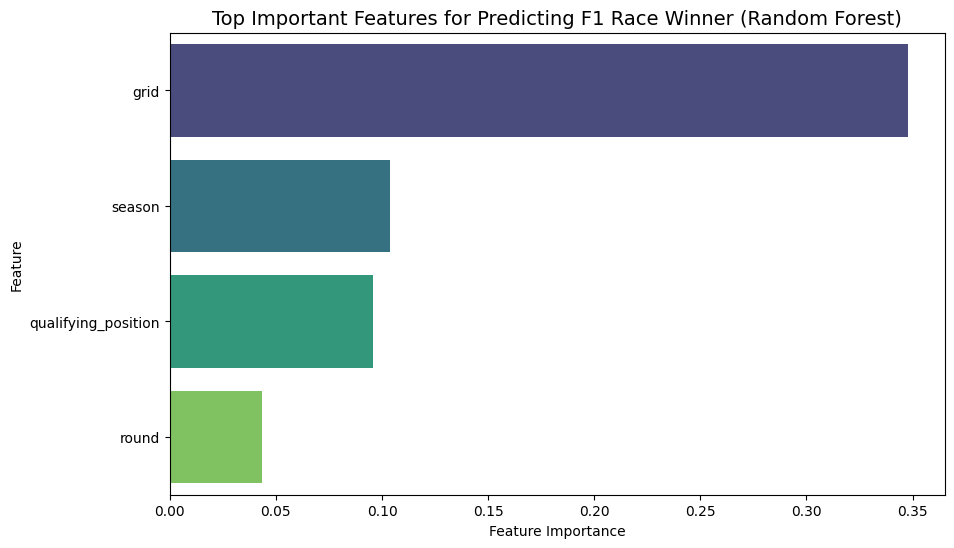

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature importances from the trained Random Forest model
importance = rf_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False).head(4)

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Top Important Features for Predicting F1 Race Winner (Random Forest)", fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def predict_driver_win_for_year(driver_last_name, year, model, feature_columns, df_drivers, df_features, grid_pos=1, qual_pos=1, race_round=1):
    # Filter drivers by last name
    driver_info = df_drivers[df_drivers['familyName'].str.lower() == driver_last_name.lower()]

    if driver_info.empty:
        print(f"Driver with last name '{driver_last_name}' not found.")
        return

    driver_id = driver_info['driver_id'].iloc[0]
    given_name = driver_info['givenName'].iloc[0]
    nationality = driver_info['nationality'].iloc[0]

    # Get a sample constructor for the driver from df_features
    driver_constructor = df_features[df_features['driver_id'] == driver_id]['constructor_id'].mode()
    if driver_constructor.empty:
        print(f"Could not determine constructor for {given_name} {driver_last_name}.")
        return
    constructor_id = driver_constructor.iloc[0]

    # Create a DataFrame for prediction with all feature columns
    X_predict = pd.DataFrame(0, index=[0], columns=feature_columns)

    # Set base features for prediction using custom inputs or defaults
    X_predict['grid'] = grid_pos
    X_predict['points'] = 0.0  # Initial points for a new race
    X_predict['season'] = year
    X_predict['round'] = race_round
    X_predict['qualifying_position'] = qual_pos

    # Set nationality and constructor dummies
    nationality_col = f'nationality_{nationality}'
    if nationality_col in X_predict.columns:
        X_predict[nationality_col] = 1
    else:
        print(f"Warning: Nationality column '{nationality_col}' not found in model features. This might affect prediction accuracy.")

    constructor_col = f'constructor_id_{constructor_id}'
    if constructor_col in X_predict.columns:
        X_predict[constructor_col] = 1
    else:
        print(f"Warning: Constructor column '{constructor_col}' not found in model features. This might affect prediction accuracy.")

    # Ensure the order of columns matches the training data
    X_predict = X_predict[feature_columns]

    # Predict probability
    win_probability = model.predict_proba(X_predict)[:, 1][0]

    print(f"\n⌛ Predicted Win Probability for {given_name} {driver_last_name} in {year} (Round {race_round}):")
    print(f"   Constructor: {constructor_id}")
    print(f"   Grid Position: {grid_pos}")
    print(f"   Qualifying Position: {qual_pos}")
    print(f"   Predicted Win Probability: {win_probability:.2%}")

In [ ]:
driver_name_input = input("Enter the driver's last name: ")
year_input = int(input("Enter the target year: "))
grid_pos_input = int(input("Enter the grid position (e.g., 1 for pole, 5, 10): "))
qual_pos_input = int(input("Enter the qualifying position (e.g., 1 for pole, 5, 10): "))
race_round_input = int(input("Enter the race round (e.g., 1 for first race, 10): "))

predict_driver_win_for_year(driver_name_input, year_input, rf_model, X.columns, df_drivers, df_features, grid_pos=grid_pos_input, qual_pos=qual_pos_input, race_round=race_round_input)

Enter the driver's last name: Piastri
Enter the target year: 2026
Enter the grid position (e.g., 1 for pole, 5, 10): 1
Enter the qualifying position (e.g., 1 for pole, 5, 10): 1
Enter the race round (e.g., 1 for first race, 10): 21

⌛ Predicted Win Probability for Oscar Piastri in 2026 (Round 21):
   Constructor: mclaren
   Grid Position: 1
   Qualifying Position: 1
   Predicted Win Probability: 67.00%


In [ ]:
driver_name_input = input("Enter the driver's last name: ")
year_input = int(input("Enter the target year: "))
grid_pos_input = int(input("Enter the grid position (e.g., 1 for pole, 5, 10): "))
qual_pos_input = int(input("Enter the qualifying position (e.g., 1 for pole, 5, 10): "))
race_round_input = int(input("Enter the race round (e.g., 1 for first race, 10): "))

predict_driver_win_for_year(driver_name_input, year_input, rf_model, X.columns, df_drivers, df_features, grid_pos=grid_pos_input, qual_pos=qual_pos_input, race_round=race_round_input)

Enter the driver's last name: Russell
Enter the target year: 2026
Enter the grid position (e.g., 1 for pole, 5, 10): 1
Enter the qualifying position (e.g., 1 for pole, 5, 10): 1
Enter the race round (e.g., 1 for first race, 10): 20

⌛ Predicted Win Probability for George Russell in 2026 (Round 20):
   Constructor: mercedes
   Grid Position: 1
   Qualifying Position: 1
   Predicted Win Probability: 55.50%
